In [2]:
import numpy as np

In [3]:
import os

In [4]:
dataset_path = os.getcwd().replace('Concepts', 'Dataset') + '/insurance.csv'

In [5]:
data = np.loadtxt(dataset_path, delimiter=',', skiprows=1, usecols=[1,2])

In [6]:
data.shape

(63, 2)

In [7]:
import matplotlib.pyplot as plt

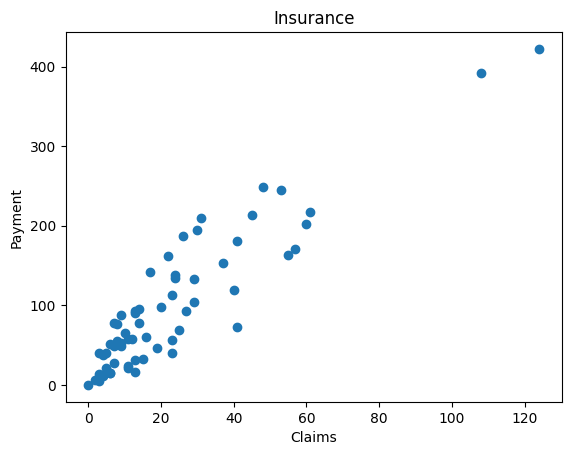

In [8]:
plt.title('Insurance')
plt.xlabel('Claims')
plt.ylabel('Payment')

plt.scatter(data[:,0], data[:,1], marker='o')

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
x = np.reshape(data[:,0], (data[:,0].size,1))
y = data[:,1]

In [12]:
x.shape, y.shape

((63, 1), (63,))

In [13]:
model.fit(x, y)

LinearRegression()

In [14]:
m = model.coef_[0]

In [15]:
c = model.intercept_

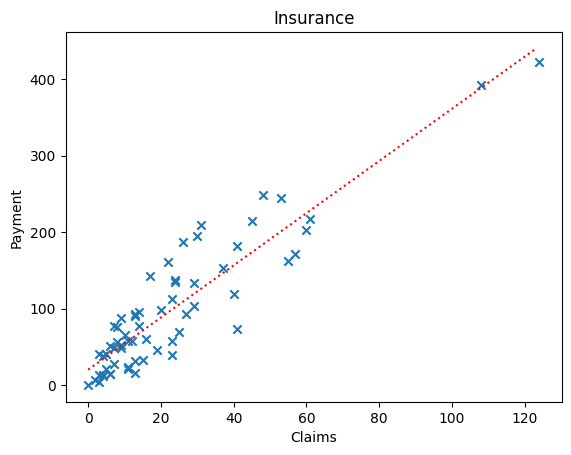

In [16]:
plt.title('Insurance')
plt.xlabel('Claims')
plt.ylabel('Payment')

plt.scatter(x, y, marker='x')
plt.plot(m * np.arange(np.min(x), np.max(x)) + c, 'r:')

# Standardisation

Standardization comes into the picture when features of the input data set have large differences between their ranges, or simply when they are measured in different units (e.g., pounds, meters, miles, etc.).

Standardization can be done using z score and after standardisation all features will have a mean of zero and standard deviation of 1 thus, the same scale.

In [17]:
x = data[:,0]

In [18]:
np.mean(x)

22.904761904761905

In [19]:
np.std(x)

23.165871370874054

In [20]:
def z_score(x: np.ndarray) -> np.ndarray:
    u = np.mean(x)
    s = np.std(x)

    return (x - u) / s

In [21]:
x = z_score(x).reshape((x.size, 1))

In [22]:
y = z_score(data[:,1])

In [23]:
x.shape, y.shape

((63, 1), (63,))

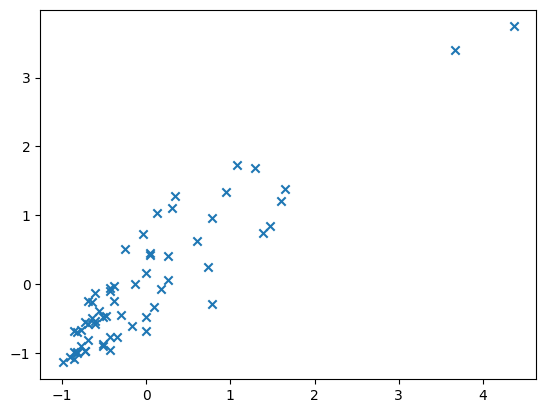

In [24]:
plt.scatter(x, y, marker='x')

In [25]:
model = LinearRegression()

In [26]:
model.fit(x, y)

LinearRegression()

In [27]:
m = model.coef_[0]
c = model.intercept_

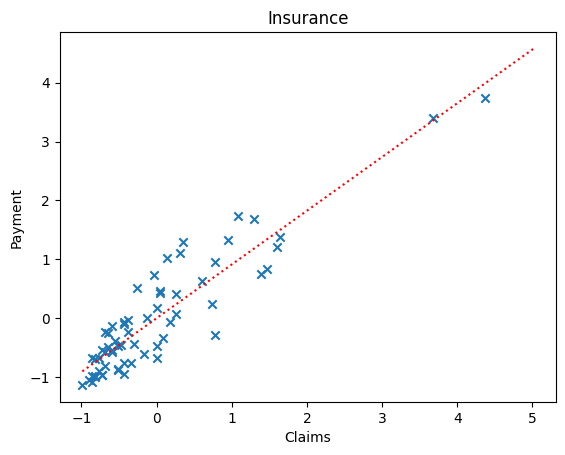

In [28]:
plt.title('Insurance')
plt.xlabel('Claims')
plt.ylabel('Payment')

plt.scatter(x, y, marker='x')
plt.plot(np.arange(np.min(x), np.max(x) + 1) ,m * np.arange(np.min(x), np.max(x) + 1) + c, 'r:')

In [29]:
# We can make predication using this model
c = np.array([[40], [50]])
z_c = (c - np.mean(data[:,0])) / np.std(data[:,0])

In [30]:
z_c

array([[0.73794928],
       [1.16961878]])

In [31]:
z_p = model.predict(z_c)

In [32]:
z_p

array([0.67365784, 1.06771952])

In [33]:
p = np.mean(data[:,1]) + z_p * np.std(data[:,1])
p

array([156.54742816, 190.68566376])

# Using StandardScaler()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
np.mean(data, axis = 0)

array([22.9047619 , 98.18730159])

In [36]:
np.std(data, axis = 0)

array([23.16587137, 86.63170447])

In [37]:
data = StandardScaler().fit_transform(data)

In [38]:
np.mean(data, axis = 0)

array([ 3.17206578e-17, -3.40115942e-16])

In [39]:
np.std(data, axis = 0)

array([1., 1.])